# Credit Card Fraud Analysis using Logistic Regression
# - By Nihal Patel

Logistic regression is a statistical algorithm used for binary classification problems, where the goal is to predict the probability of an event occurring or not occurring. Despite its name, logistic regression is primarily a classification algorithm rather than a regression algorithm.

The key idea behind logistic regression is to model the relationship between a set of input features (independent variables) and a binary outcome (dependent variable) using a logistic function. The logistic function (also known as the sigmoid function) maps any real-valued input to a value between 0 and 1, representing the probability of the event occurring.

In this project, we will see that how Logistic Regression can help us to classify Credit Card Fraud Analysis

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Data Preprocessing Tasks

In [3]:
# We will first, load the dataset
dataCreditCard = pd.read_csv("C:/Users/nihal/Fall2023/students-submissions/8945100/archive/creditcard.csv")
dataCreditCard.head

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5   
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321  \
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22   
0       0.462388  0.239599  0.

In [4]:
# We will Identify Numerical features
numericFeatures = dataCreditCard.select_dtypes(include=['float64', 'int64']).columns
numericFeatures.value_counts

<bound method IndexOpsMixin.value_counts of Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')>

### We will normalize numerical features using appropriate method based on feature characteristics.

In [5]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the numerical features
normalized_features = scaler.fit_transform(dataCreditCard)

# Replace the original numerical features with the normalized ones
dataCreditCard[dataCreditCard.columns] = normalized_features

# Print the first few rows of the normalized dataset
print("Normalized Dataset is as below:\n")
dataCreditCard

Normalized Dataset is as below:



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0.0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,...,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030,0.0
284803,0.999971,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,...,0.564933,0.553153,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965,0.0
284804,0.999977,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,...,0.565220,0.537005,0.664877,0.468492,0.592824,0.411177,0.416593,0.312585,0.002642,0.0
284805,0.999977,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,...,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389,0.0


### We will detect and handle outliers for all the numerical features in the dataset using either the Whiskers Approach, or Z-score approach

In [6]:
# We will select "Time" and "Class" columns for outlier detection
columnsToHandleOutliers = ["Time","Amount"]
outlierData = dataCreditCard[columnsToHandleOutliers]

# We will set threshold for the Z-score
z_threshold = 3

# We will Calculate Z-scores for the selected columns
z_scores = stats.zscore(outlierData)

# Identify outliers based on the Z-score threshold
outliers = (abs(z_scores) > z_threshold).any(axis=1)

# Remove outliers from the original dataset
filteredData = dataCreditCard[~outliers]

# Print the number of outliers detected and the filtered dataset
print(f"Total number of outliers detected:",sum(outliers))
print("Filtered Dataset:")
print(filteredData.head())

filteredData.shape


Total number of outliers detected: 4076
Filtered Dataset:
       Time        V1        V2        V3        V4        V5        V6   
0  0.000000  0.935192  0.766490  0.881365  0.313023  0.763439  0.267669  \
1  0.000000  0.978542  0.770067  0.840298  0.271796  0.766120  0.262192   
2  0.000006  0.935217  0.753118  0.868141  0.268766  0.762329  0.281122   
3  0.000006  0.941878  0.765304  0.868484  0.213661  0.765647  0.275559   
4  0.000012  0.938617  0.776520  0.864251  0.269796  0.762975  0.263984   

         V7        V8        V9  ...       V21       V22       V23       V24   
0  0.266815  0.786444  0.475312  ...  0.561184  0.522992  0.663793  0.391253  \
1  0.264875  0.786298  0.453981  ...  0.557840  0.480237  0.666938  0.336440   
2  0.270177  0.788042  0.410603  ...  0.565477  0.546030  0.678939  0.289354   
3  0.266803  0.789434  0.414999  ...  0.559734  0.510277  0.662607  0.223826   
4  0.268968  0.782484  0.490950  ...  0.561327  0.547271  0.663392  0.401270   

        V2

(280731, 31)

## Descriptive Analytics Tasks
### We will analyze the distribution of fraud vs non-fraud transactions.

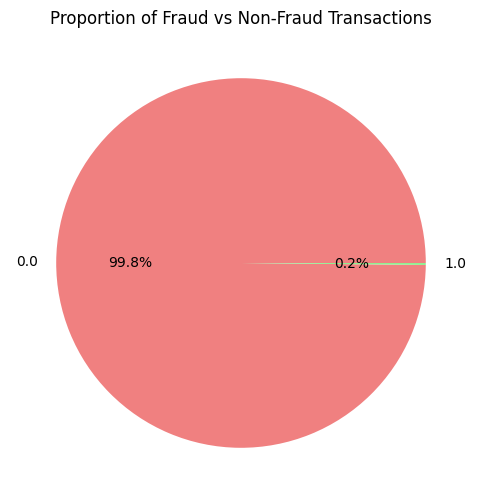

Summary Statistics:
Total number of transactions:
 284807
Total number of non-fraud transactions:
 280250
Total number of fraud transactions:
 481
Percentage of fraud transactions:
 0.17%


In [7]:
fraudCounts = filteredData['Class'].value_counts()

# Plot the distribution
plt.figure(figsize=(6, 6))
plt.pie(fraudCounts, labels=fraudCounts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Proportion of Fraud vs Non-Fraud Transactions')
plt.show()

# Print summary statistics
print("Summary Statistics:")
print(f"Total number of transactions:\n",len(dataCreditCard))
print(f"Total number of non-fraud transactions:\n",fraudCounts[0])
print(f"Total number of fraud transactions:\n",fraudCounts[1])
print(f"Percentage of fraud transactions:\n {100 * fraudCounts[1] / len(dataCreditCard):.2f}%")

### We will analyze the correlation between fraud/non-fraud transactions and all the other numerical features.

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Name: Class, dtype: float64


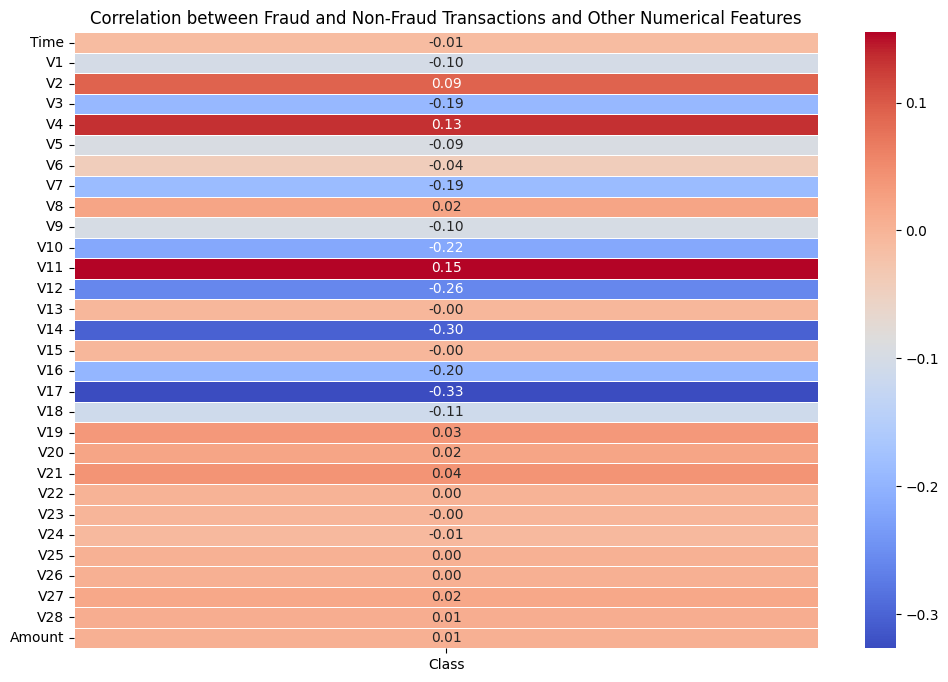

In [8]:
correlationMatrix = dataCreditCard.corr()

# We will extract the correlation of features with the 'Class' column
fraudCorrelation = correlationMatrix['Class'].drop('Class')
print(fraudCorrelation)

# Plot a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(fraudCorrelation.to_frame(), annot=True, cmap="coolwarm", fmt=".2f", cbar=True, linewidths=.5)
plt.title('Correlation between Fraud and Non-Fraud Transactions and Other Numerical Features')
plt.show()


Looking at the above heat map, we can see that v1 and v4 have the highest correlation

### From the previous step, we will choose the 10 features with highest correlation with the target variable, and plot their distributions against the fraud/non-fraud transaction

C:\Users\nihal\AppData\Local\Temp\ipykernel_28020\3954069783.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataCreditCard[dataCreditCard['Class'] == 0][feature], label='Non-Fraud', shade=True)
C:\Users\nihal\AppData\Local\Temp\ipykernel_28020\3954069783.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataCreditCard[dataCreditCard['Class'] == 1][feature], label='Fraud', shade=True)


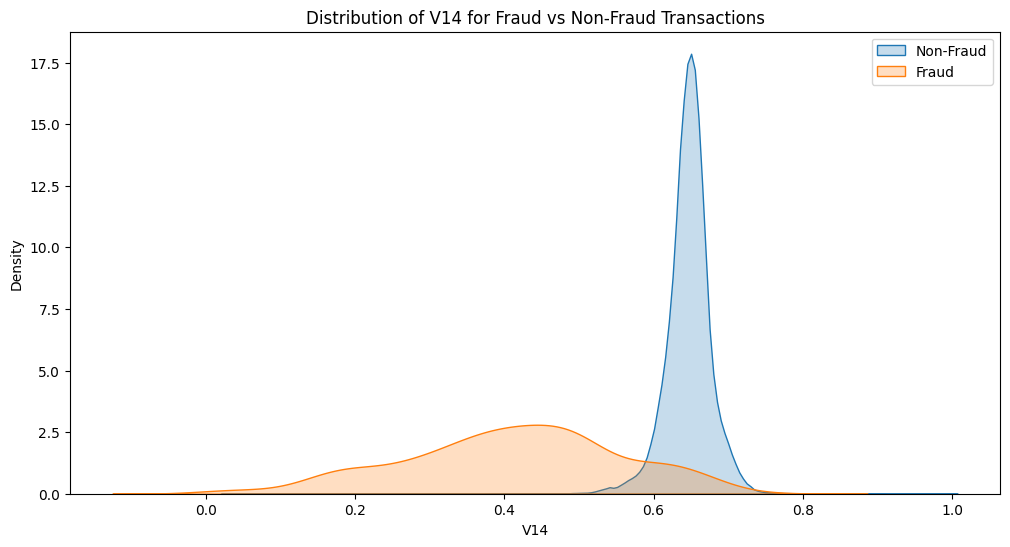

C:\Users\nihal\AppData\Local\Temp\ipykernel_28020\3954069783.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataCreditCard[dataCreditCard['Class'] == 0][feature], label='Non-Fraud', shade=True)
C:\Users\nihal\AppData\Local\Temp\ipykernel_28020\3954069783.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataCreditCard[dataCreditCard['Class'] == 1][feature], label='Fraud', shade=True)


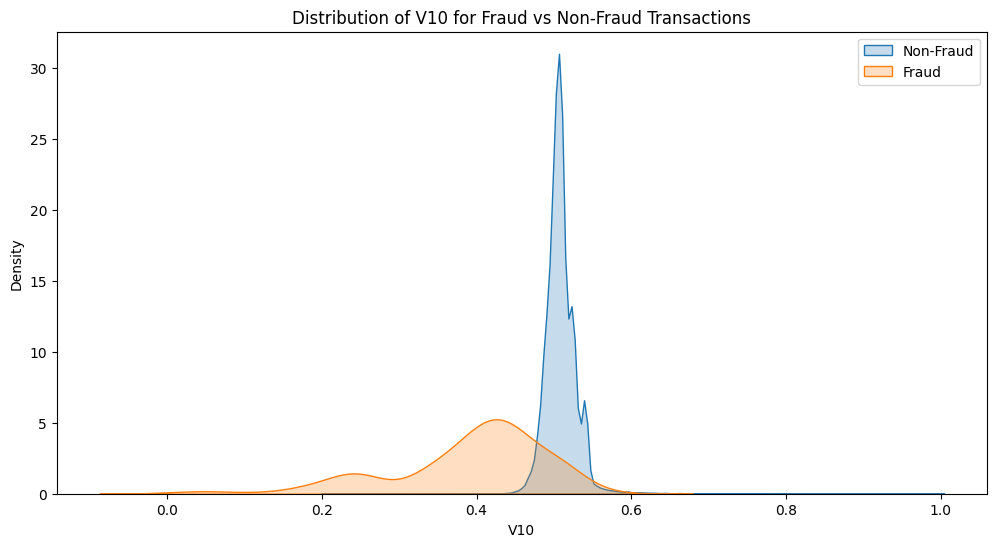

C:\Users\nihal\AppData\Local\Temp\ipykernel_28020\3954069783.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataCreditCard[dataCreditCard['Class'] == 0][feature], label='Non-Fraud', shade=True)
C:\Users\nihal\AppData\Local\Temp\ipykernel_28020\3954069783.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataCreditCard[dataCreditCard['Class'] == 1][feature], label='Fraud', shade=True)


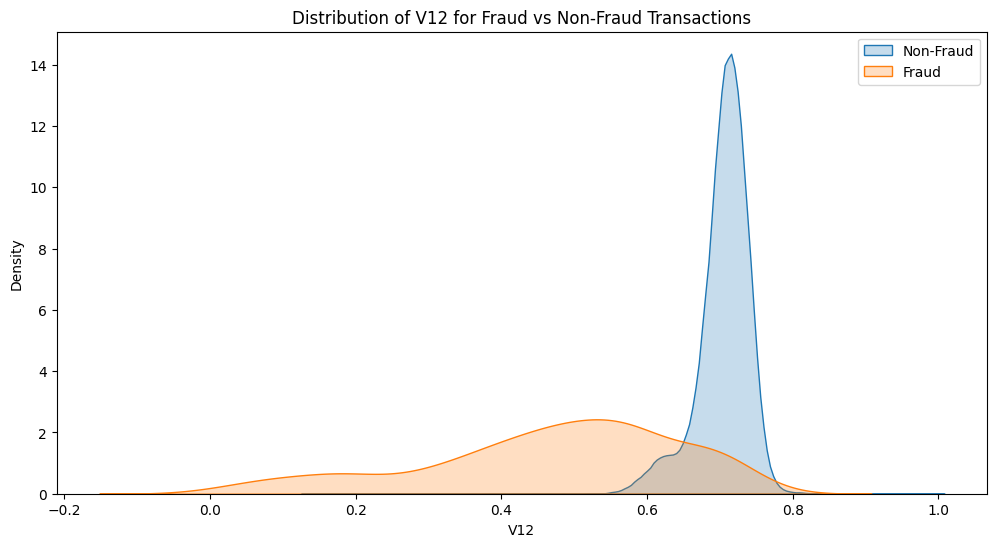

C:\Users\nihal\AppData\Local\Temp\ipykernel_28020\3954069783.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataCreditCard[dataCreditCard['Class'] == 0][feature], label='Non-Fraud', shade=True)
C:\Users\nihal\AppData\Local\Temp\ipykernel_28020\3954069783.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataCreditCard[dataCreditCard['Class'] == 1][feature], label='Fraud', shade=True)


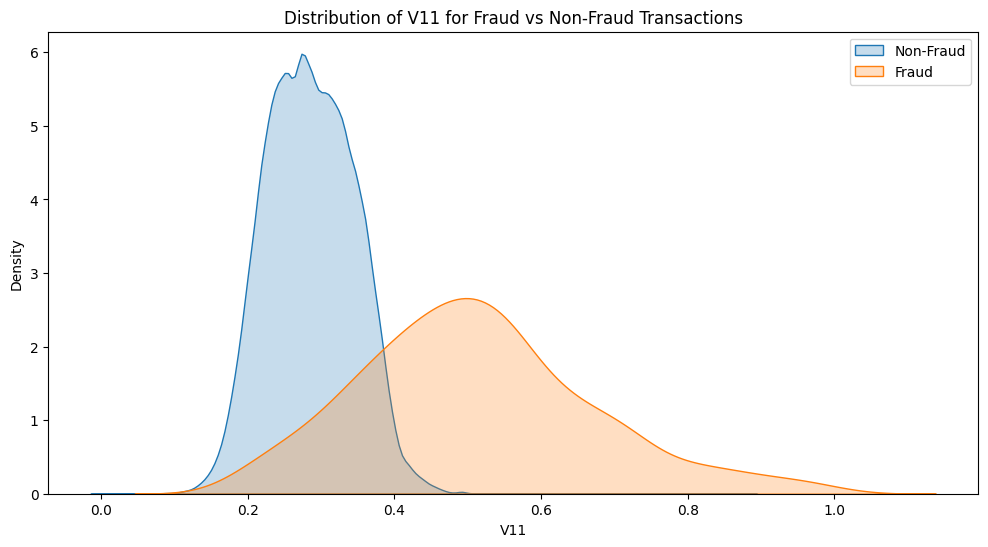

C:\Users\nihal\AppData\Local\Temp\ipykernel_28020\3954069783.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataCreditCard[dataCreditCard['Class'] == 0][feature], label='Non-Fraud', shade=True)
C:\Users\nihal\AppData\Local\Temp\ipykernel_28020\3954069783.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataCreditCard[dataCreditCard['Class'] == 1][feature], label='Fraud', shade=True)


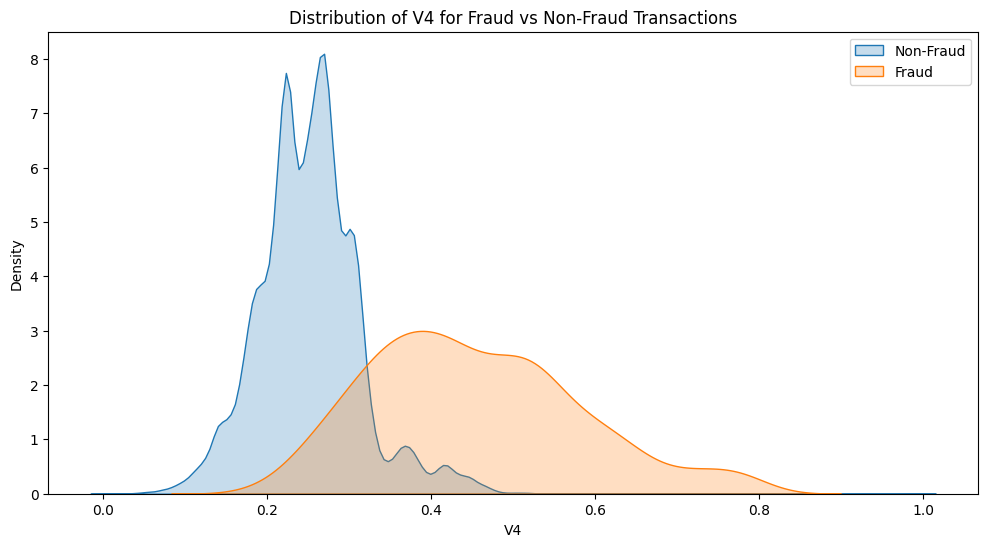

C:\Users\nihal\AppData\Local\Temp\ipykernel_28020\3954069783.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataCreditCard[dataCreditCard['Class'] == 0][feature], label='Non-Fraud', shade=True)
C:\Users\nihal\AppData\Local\Temp\ipykernel_28020\3954069783.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataCreditCard[dataCreditCard['Class'] == 1][feature], label='Fraud', shade=True)


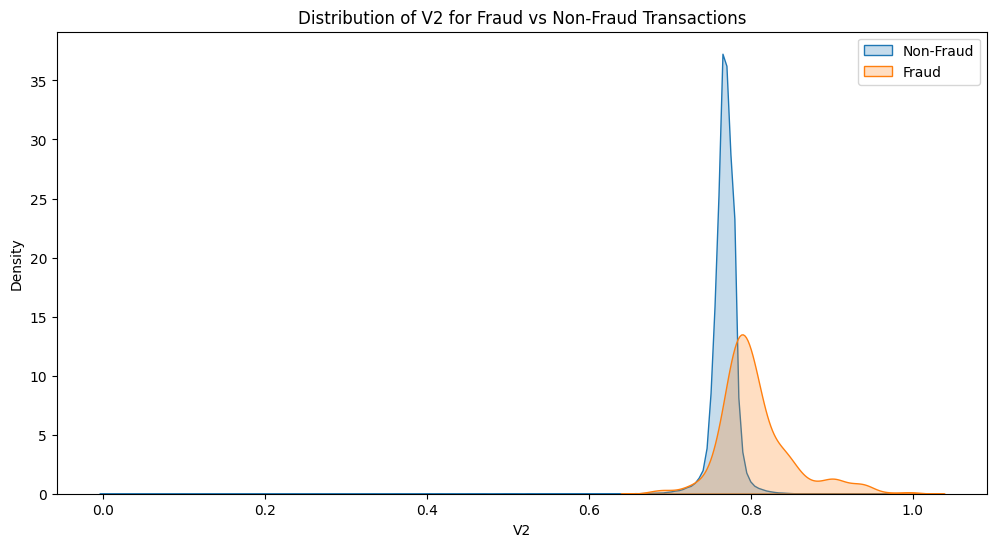

C:\Users\nihal\AppData\Local\Temp\ipykernel_28020\3954069783.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataCreditCard[dataCreditCard['Class'] == 0][feature], label='Non-Fraud', shade=True)
C:\Users\nihal\AppData\Local\Temp\ipykernel_28020\3954069783.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataCreditCard[dataCreditCard['Class'] == 1][feature], label='Fraud', shade=True)


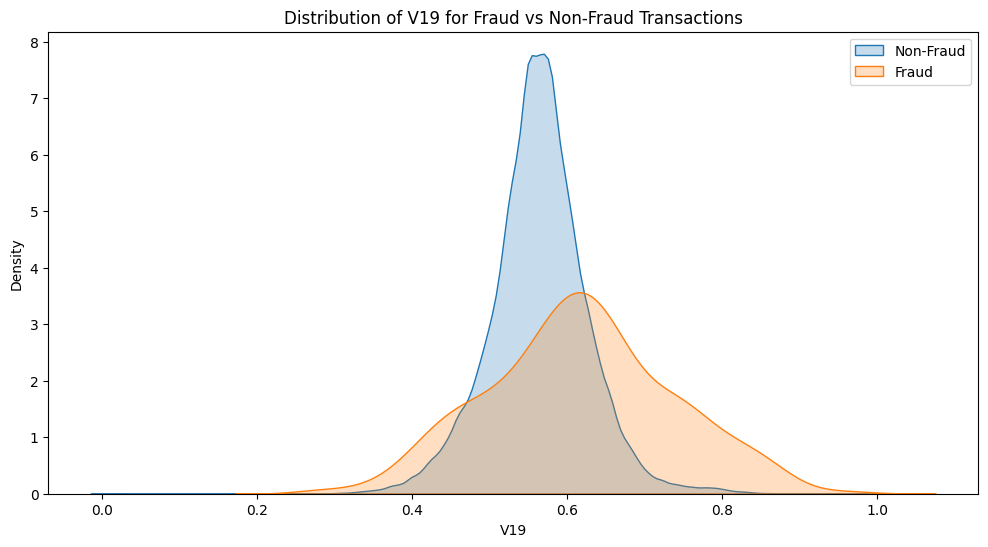

C:\Users\nihal\AppData\Local\Temp\ipykernel_28020\3954069783.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataCreditCard[dataCreditCard['Class'] == 0][feature], label='Non-Fraud', shade=True)
C:\Users\nihal\AppData\Local\Temp\ipykernel_28020\3954069783.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataCreditCard[dataCreditCard['Class'] == 1][feature], label='Fraud', shade=True)


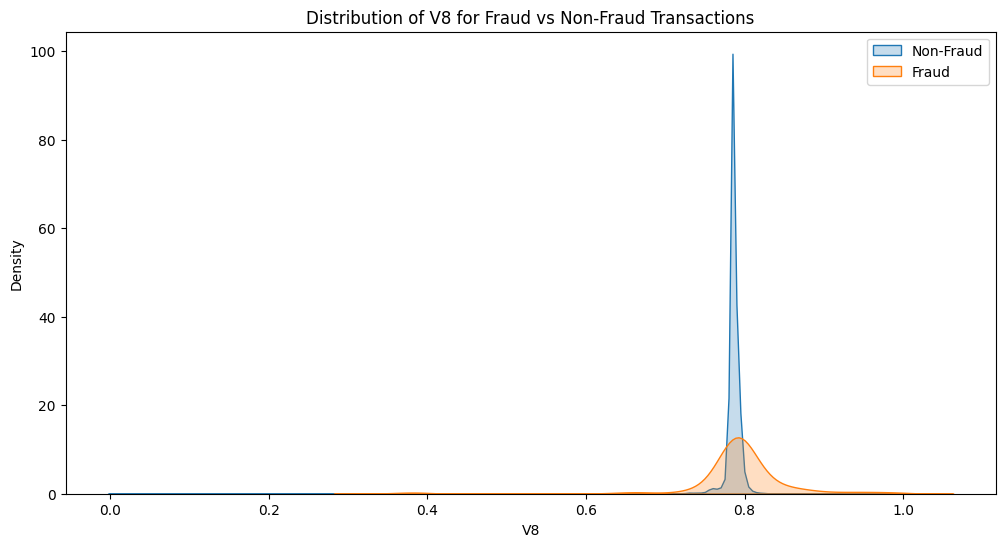

C:\Users\nihal\AppData\Local\Temp\ipykernel_28020\3954069783.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataCreditCard[dataCreditCard['Class'] == 0][feature], label='Non-Fraud', shade=True)
C:\Users\nihal\AppData\Local\Temp\ipykernel_28020\3954069783.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataCreditCard[dataCreditCard['Class'] == 1][feature], label='Fraud', shade=True)


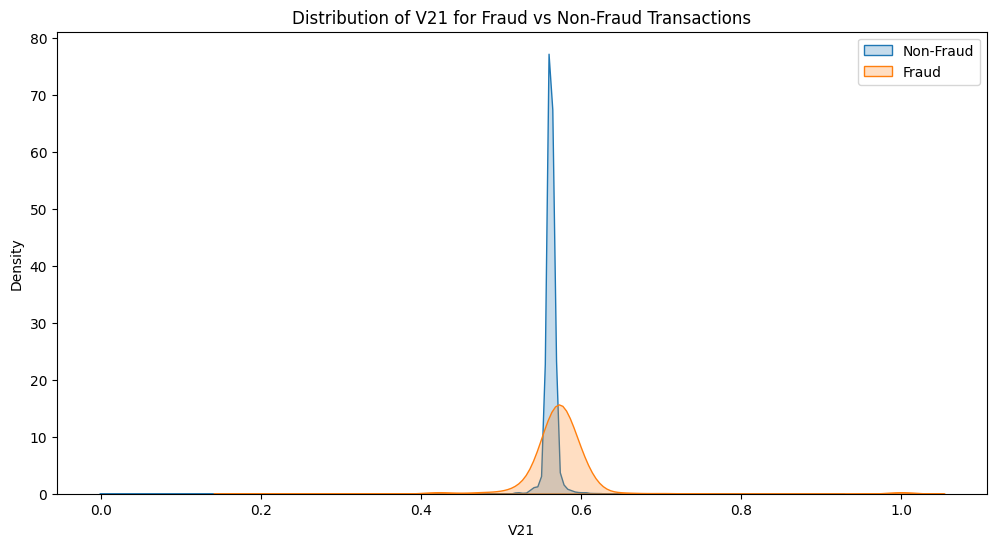

C:\Users\nihal\AppData\Local\Temp\ipykernel_28020\3954069783.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataCreditCard[dataCreditCard['Class'] == 0][feature], label='Non-Fraud', shade=True)
C:\Users\nihal\AppData\Local\Temp\ipykernel_28020\3954069783.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataCreditCard[dataCreditCard['Class'] == 1][feature], label='Fraud', shade=True)


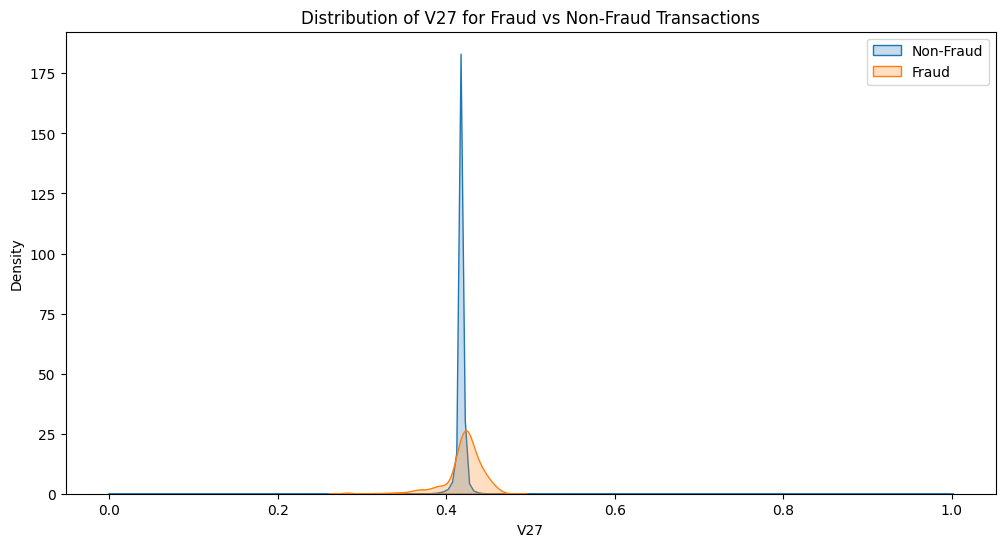

In [9]:
# We will choose top 10 features to show correlation
topFeatures = ['V14', 'V10', 'V12', 'V11', 'V4', 'V2', 'V19', 'V8', 'V21', 'V27']

# We will plot the distributions of the selected features for both fraud as well as non-fraud transactions
for feature in topFeatures:
    plt.figure(figsize=(12, 6))
    sns.kdeplot(dataCreditCard[dataCreditCard['Class'] == 0][feature], label='Non-Fraud', shade=True)
    sns.kdeplot(dataCreditCard[dataCreditCard['Class'] == 1][feature], label='Fraud', shade=True)
    plt.title(f'Distribution of {feature} for Fraud vs Non-Fraud Transactions')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

## ML Model Training and Testing Tasks

### We will split the cleaned data into training and testing sets (e.g., 80% training, 20% testing).

In [10]:
X = filteredData.drop("Class", axis=1)
y = filteredData["Class"]

# We will split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We will print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (224584, 30)
Shape of X_test: (56147, 30)
Shape of y_train: (224584,)
Shape of y_test: (56147,)


### We will use 5-fold cross-validation to train and validate the performance of all the models

In [11]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# We will separate the features and target variable
X = filteredData.drop('Class', axis=1)
y = filteredData['Class']

# We will define the models
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC()
}

# We will perform 5-fold cross-validation for each model
for modelName, model in models.items():
    scores = cross_validate(model, X, y, cv=5, scoring='accuracy')
    print(f"Model: {modelName}")
    print("Cross-validation Accuracy Scores:", scores['test_score'])
    print("Average Accuracy:", scores['test_score'].mean())
    print()

Model: Random Forest
Cross-validation Accuracy Scores: [0.01741856 0.99957254 0.99914509 0.9996616  0.99948349]
Average Accuracy: 0.8030562554106723

Model: Logistic Regression
Cross-validation Accuracy Scores: [0.99898481 0.99919852 0.99878887 0.99932319 0.99878887]
Average Accuracy: 0.9990168525458349

Model: Decision Tree
Cross-validation Accuracy Scores: [0.00550341 0.99935881 0.99070281 0.99898479 0.99905603]
Average Accuracy: 0.7987211715762095

Model: Support Vector Machine
Cross-validation Accuracy Scores: [0.99902043 0.99960816 0.99912728 0.99964379 0.99946568]
Average Accuracy: 0.9993730665748993



### We will train a logistic regression model as a baseline model.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# We will separate the features and target variable
X = filteredData.drop('Class', axis=1)
y = filteredData['Class']

# We will split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We will initialize and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# We will make predictions on the testing set
y_pred = logreg.predict(X_test)

# Now, we will calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.999216342814398


### We will print the learned coefficients (weights) of the model.

In [13]:
from sklearn.linear_model import LogisticRegression

# We will separate the features and target variable
X = filteredData.drop('Class', axis=1)
y = filteredData['Class']

# We will initialize and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X, y)

# We will print the learned coefficients
coefficients = logreg.coef_
print("Learned Coefficients:")
for feature, coefficient in zip(X.columns, coefficients[0]):
    print(feature, ":", coefficient)

Learned Coefficients:
Time : 0.5793092701025208
V1 : -0.10392334030865992
V2 : -0.08044646540593134
V3 : -1.0841199993700668
V4 : 8.109616665373137
V5 : 0.7271944966450501
V6 : -0.39418944050927135
V7 : -0.07642855536543491
V8 : -2.417804027869088
V9 : -2.773989384186573
V10 : -4.383478635748433
V11 : 5.274320029591466
V12 : -6.2201204366880525
V13 : -1.9844295189363088
V14 : -11.728082258551202
V15 : -0.1390536307237061
V16 : -2.901381537303496
V17 : -1.8557251838316193
V18 : -0.0724390359491771
V19 : -0.023594241310670918
V20 : -0.0884144891953474
V21 : 1.009584039344079
V22 : 1.123706663544764
V23 : -0.16950187792406748
V24 : -0.5139143574946262
V25 : -0.46626428691404365
V26 : 0.5071034087944698
V27 : -0.06055288359992352
V28 : 0.03817679407736386
Amount : 0.45638952881987027


Based on the learned coefficients of the logistic regression model, we can see that the feature "V14" has the highest weight in the weight vector. It has a weight of approximately -11.7281.

### We will evaluate the model's performance on the test set using the following metrics:
a. Accuracy <br>
b. Precision <br>
c. Recall <br>
d. F1-Score <br>


In [14]:
from sklearn.metrics import classification_report

# We will separate the features and target variable
X = filteredData.drop('Class', axis=1)
y = filteredData['Class']

# We will split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We will initialize and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# We will make predictions on the testing set
y_pred = logreg.predict(X_test)

# Now, we will calculate and print the evaluation metrics
print("Evaluation Metrics:")
print(classification_report(y_test, y_pred))

Evaluation Metrics:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56067
         1.0       0.85      0.55      0.67        80

    accuracy                           1.00     56147
   macro avg       0.92      0.77      0.83     56147
weighted avg       1.00      1.00      1.00     56147



### We will plot the ROC Curve and print the AUC of the model on the test set.

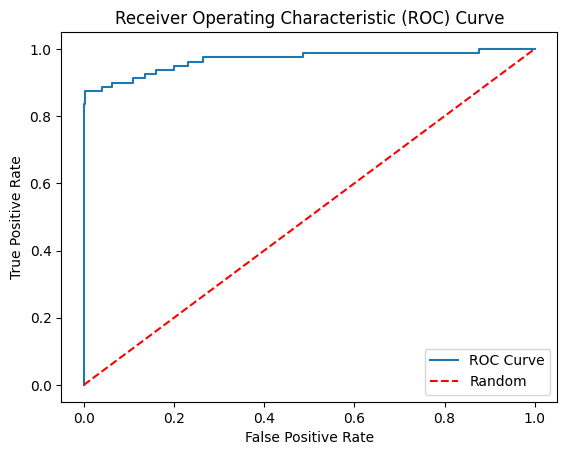

AUC is as below:
 0.9676949007437531


In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# We will separate the features and target variable
X = filteredData.drop('Class', axis=1)
y = filteredData['Class']

# We will split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now we will initialize and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# We will make predictions on the testing set
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# We will calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Now, we will calculate the AUC
auc = roc_auc_score(y_test, y_pred_proba)

# We will plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# We will print the AUC
print("AUC is as below:\n", auc)

### We will apply a well-known technique to handle class imbalance and compare the model performance on the test set with and without this approach.

In [21]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

# We will separate the features and target variable
X = filteredData.drop('Class', axis=1)
y = filteredData['Class']

# We will split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We will apply oversampling to the training set
overSampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = overSampler.fit_resample(X_train, y_train)

# We will initialize and train the logistic regression model without oversampling
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# We will make predictions on the testing set without oversampling
y_pred = logreg.predict(X_test)

# We will calculate and print the evaluation metrics without oversampling
print("Evaluation Metrics without Oversampling is as below:",classification_report(y_test, y_pred))

# We will Initialize and train the logistic regression model with oversampling
logregResampled = LogisticRegression()
logregResampled.fit(X_train_resampled, y_train_resampled)

# We will make predictions on the testing set with oversampling
y_pred_resampled = logregResampled.predict(X_test)

# We will calculate and print the evaluation metrics with oversampling
print("Evaluation Metrics with Oversampling is as below:\n",classification_report(y_test, y_pred_resampled))

Evaluation Metrics without Oversampling is as below:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56067
         1.0       0.85      0.55      0.67        80

    accuracy                           1.00     56147
   macro avg       0.92      0.77      0.83     56147
weighted avg       1.00      1.00      1.00     56147

Evaluation Metrics with Oversampling is as below:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     56067
         1.0       0.05      0.88      0.10        80

    accuracy                           0.98     56147
   macro avg       0.53      0.93      0.55     56147
weighted avg       1.00      0.98      0.99     56147



c:\Users\nihal\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### We will try the KNN and SVM classification and compare their performance to the logistic regression baseline.

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# We will separate the features and target variable
X = filteredData.drop('Class', axis=1)
y = filteredData['Class']

# We will split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We will initialize and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# We will make predictions on the testing set using logistic regression
y_pred_logreg = logreg.predict(X_test)

# We will initialize and train the KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# We will make predictions on the testing set using KNN
y_pred_knn = knn.predict(X_test)

# We will initialize and train the SVM classifier
svm = SVC()
svm.fit(X_train, y_train)

# We will make predictions on the testing set using SVM
y_pred_svm = svm.predict(X_test)

# We will calculate and print the evaluation metrics for logistic regression
print("Evaluation Metrics for Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))

# We will calculate and print the evaluation metrics for KNN
print("Evaluation Metrics for KNN:")
print(classification_report(y_test, y_pred_knn))

# We will calculate and print the evaluation metrics for SVM
print("Evaluation Metrics for SVM:")
print(classification_report(y_test, y_pred_svm))

Evaluation Metrics for Logistic Regression:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56067
         1.0       0.85      0.55      0.67        80

    accuracy                           1.00     56147
   macro avg       0.92      0.77      0.83     56147
weighted avg       1.00      1.00      1.00     56147

Evaluation Metrics for KNN:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56067
         1.0       0.91      0.75      0.82        80

    accuracy                           1.00     56147
   macro avg       0.95      0.87      0.91     56147
weighted avg       1.00      1.00      1.00     56147

Evaluation Metrics for SVM:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56067
         1.0       0.76      0.80      0.78        80

    accuracy                           1.00     56147
   macro avg       0.88     

We will compare the performance of the classifiers based on the observations as below:

1. Accuracy: We can see that all three classifiers achieve high accuracy of 1.00. It also indicates that they are able to classify the majority class (0.0) with high accuracy.

2. Handling the minority class: Both KNN and SVM perform logistic regression in terms of precision, recall, and F1-score for the minority class (1.0). They achieve higher precision, recall, and F1-score for the minority class, indicating better performance in correctly identifying positive instances.

3. Trade-off: While KNN achieves higher precision, recall, and F1-score for the minority class compared to logistic regression, it is important to note that KNN has lower precision for the majority class. On the other hand, SVM achieves comparable precision, recall, and F1-score for the minority class while maintaining high precision for the majority class.